# PORTA LÓGICA COM PERCEPTRON



Equação da reta: y = -1.27x + -1.82


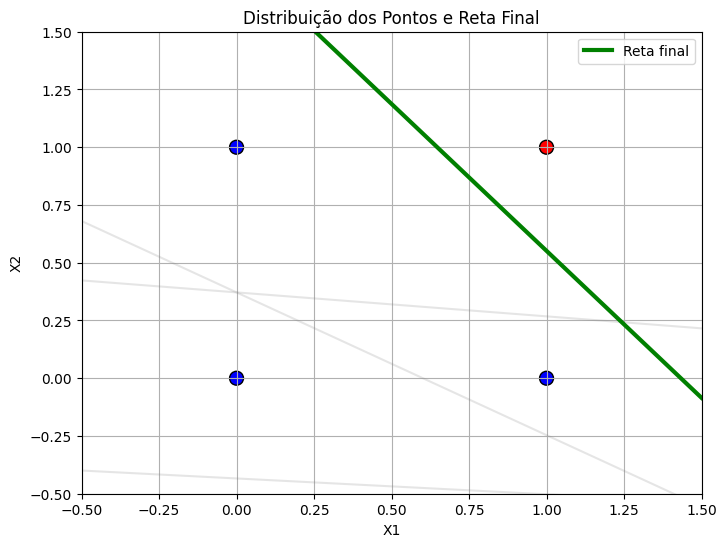

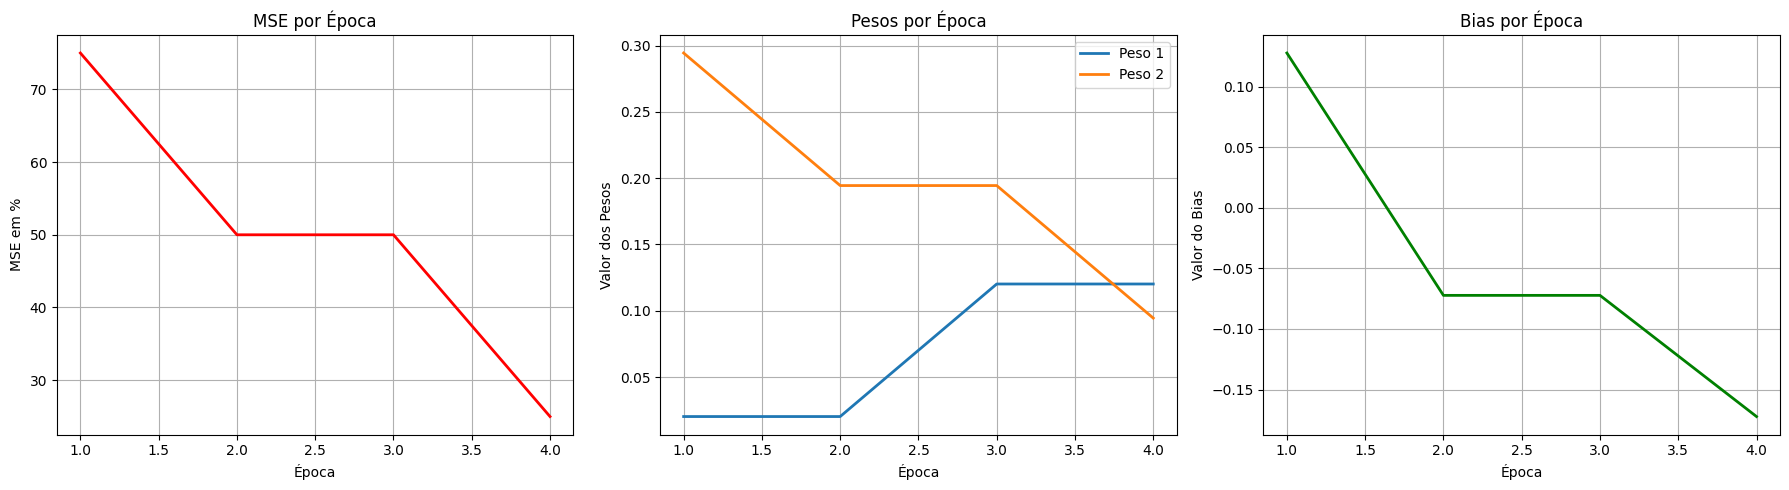

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  

w = np.random.rand(2)
b = np.random.rand()

taxa_aprendizado = 0.1
qtd_it = 50

mse_por_epoca = np.zeros(qtd_it)
pesos_por_epoca = np.zeros((qtd_it, X.shape[1]))
bias_por_epoca = np.zeros(qtd_it)

historico_w = []
historico_b = []

for epoca in range(qtd_it):
    erro_quadrado_total = 0
    for i in range(X.shape[0]):
        sum_pesos_bias = np.dot(w, X[i]) + b

        saida = 1 if sum_pesos_bias >= 0 else 0

        erro = y[i] - saida

        w += taxa_aprendizado * erro * X[i]
        b += taxa_aprendizado * erro

        erro_quadrado_total += erro**2

    mse = erro_quadrado_total / X.shape[0]

    mse_por_epoca[epoca] = mse*100
    pesos_por_epoca[epoca] = w
    bias_por_epoca[epoca] = b

    historico_w.append(w.copy())
    historico_b.append(b)

    predicoes = np.array([1 if np.dot(w, xi) + b >= 0 else 0 for xi in X])
    if np.array_equal(predicoes, y):
        break

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)

for w_hist, b_hist in zip(historico_w, historico_b):
    x1 = np.linspace(-0.5, 1.5, 100)  # limites fixos já aqui
    if w_hist[1] != 0:
        x2 = -(w_hist[0] * x1 + b_hist) / w_hist[1]
        plt.plot(x1, x2, 'gray', alpha=0.2)

x1 = np.linspace(-0.5, 1.5, 100)
if w[1] != 0:
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, 'g-', linewidth=3, label='Reta final')
    a = round(-w[0]/w[1],2)
    c = round(b/w[1],2)
    print(f"\n\nEquação da reta: y = {a}x + {c}")
    
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title('Distribuição dos Pontos e Reta Final')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(range(1, epoca + 2), mse_por_epoca[:epoca + 1], 'r-', linewidth=2)
axs[0].set_title('MSE por Época')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('MSE em %')
axs[0].grid(True)

axs[1].plot(range(1, epoca + 2), pesos_por_epoca[:epoca + 1, 0], label='Peso 1', linewidth=2)
axs[1].plot(range(1, epoca + 2), pesos_por_epoca[:epoca + 1, 1], label='Peso 2', linewidth=2)
axs[1].set_title('Pesos por Época')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Valor dos Pesos')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(range(1, epoca + 2), bias_por_epoca[:epoca + 1], 'g-', linewidth=2)
axs[2].set_title('Bias por Época')
axs[2].set_xlabel('Época')
axs[2].set_ylabel('Valor do Bias')
axs[2].grid(True)

plt.tight_layout()
plt.show()